In [1]:
import math
import numpy as np
import gym
import copy
import random
from scipy import signal, interpolate
import envs.phantom_env as phantom_env
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Definicja srodowiska.
probe = phantom_env.Probe(
    pos=np.array([0, 0, 0]), # [x, y, z]
    angle=0, 
    width=40/1000, 
    height=10/1000, 
    focal_depth=60/1000
)
phantom = phantom_env.Phantom(
    objects=[
        phantom_env.Teddy(
            belly_pos=np.array([25/1000, 0, 40/1000]), # pozycja brzuszka 
            scale=10/1000,                           # promien brzuszka
            dist_ahead=.9                            # odlegosc glowy od brzuszka
            )
            .rotate_xy(angle=90),
    ],
    x_border=(-60/1000, 60/1000), # szerokosc fantomu OX
    y_border=(-60/1000, 60/1000), # szerokosc fantomu OY
    z_border=(0, 90/1000),        # glebokosc fantomu OZ
    n_scatterers=int(4e4),        # calkowita liczba rozpraszaczy
    n_bck_scatterers=int(2e3)     # zredukowana liczba rozpraszaczy tla (poza obszarem obiektow 'objects')
) 

imaging = phantom_env.Imaging(
    c=1540, 
    fs=100e6, 
    image_width=40/1000, 
    image_grid=(40/1000, 90/1000), 
    grid_step=0.5/1000, 
    no_lines=64, 
    median_filter_size=5,
    dr_threshold=-100
)

env = phantom_env.UsPhantomEnv(
    imaging=imaging, 
    env_generator=phantom_env.const_env_generator(phantom, probe), 
    no_workers=2)

Started 2 MATLAB worker(s).
Waiting max. 120 [s] till all MATLAB workers will be available...
Checking state of workers...
...OK!


Simulating linear array in Field II...
...simulation completed.
reward 0.032016


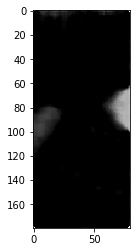

Probe: pos=[0. 0. 0.], angle=0.000000
Teddy:
belly: pos=[0.025 0.    0.04 ], r=0.01,
head: pos=[0.025 0.    0.026], r=0.005,
paw: pos=[0.025      0.00872098 0.03127902], r=0.0033333333333333335
paw: pos=[0.025      0.00872098 0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.03127902], r=0.0033333333333333335



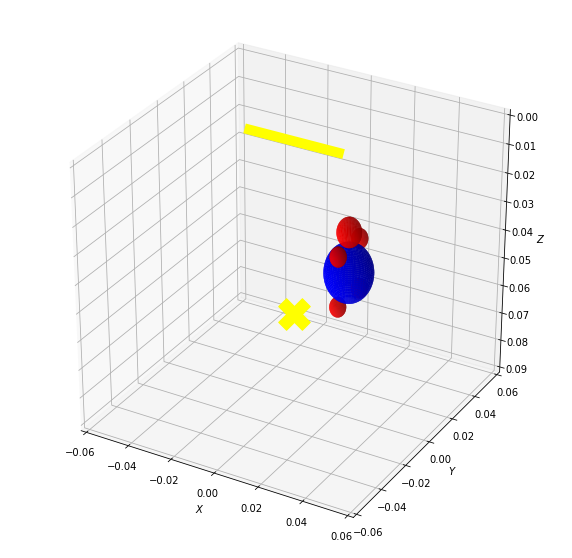

In [3]:
# same zera - nie podejmujemy akcji
# AKCJA:
# [x, z, theta]:
# - x: {-1: przesun w lewo o 10 mm, 1: przesun w prawo o 10mm, 0 nie przesuwaj}
# - z: {-1: przesun w gore focal o 10 mm, 1: przesun w dol focal o 10mm, 0 nie przesuwaj}
# - theta: {-1: obrot clockwise o 10 stopni, 1: obrot counter-clockwise o 10 stopni, 0 nie obracaj}
ob, reward, episode_over, _ = env.step(action=[0, 0, 0])
print("reward %f" % reward)
plt.imshow(ob, cmap='gray')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')
env.render_pyplot(ax)
print(env.to_string())

Simulating linear array in Field II...
...simulation completed.
reward 0.025000


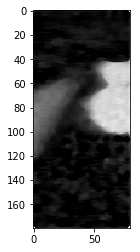

Probe: pos=[0.01 0.   0.  ], angle=0.000000
Teddy:
belly: pos=[0.025 0.    0.04 ], r=0.01,
head: pos=[0.025 0.    0.026], r=0.005,
paw: pos=[0.025      0.00872098 0.03127902], r=0.0033333333333333335
paw: pos=[0.025      0.00872098 0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.03127902], r=0.0033333333333333335



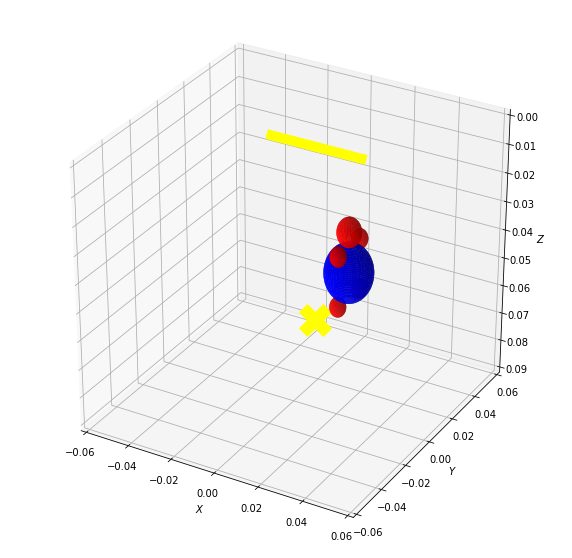

In [4]:
# przesun glowice o 10 mm w prawo
ob, reward, episode_over, _ = env.step(action=[1, 0, 0])

print("reward %f" % reward)
plt.imshow(ob, cmap='gray')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')
env.render_pyplot(ax)
print(env.to_string())

Simulating linear array in Field II...
...simulation completed.
reward 0.025000


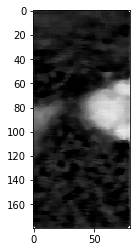

Probe: pos=[0.01 0.   0.  ], angle=40.000000
Teddy:
belly: pos=[0.025 0.    0.04 ], r=0.01,
head: pos=[0.025 0.    0.026], r=0.005,
paw: pos=[0.025      0.00872098 0.03127902], r=0.0033333333333333335
paw: pos=[0.025      0.00872098 0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.03127902], r=0.0033333333333333335



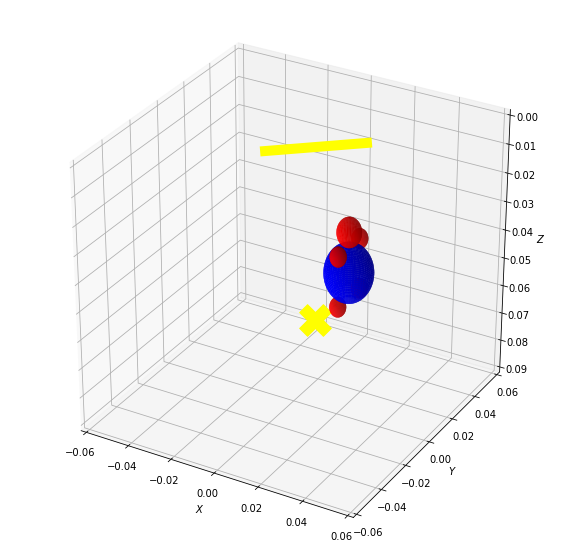

In [5]:
# obroc glowice o 40 stopni
# tutaj troche oszukiwane, bo akcja obrotu jest > 1 - ale tylko dla celow pokazowych,
# zeby nie wykonywac 4 razy akcji [0, 0, 1]
ob, reward, episode_over, _ = env.step(action=[0, 0, 4])
print("reward %f" % reward)
plt.imshow(ob, cmap='gray')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')
env.render_pyplot(ax)
print(env.to_string())

Simulating linear array in Field II...
...simulation completed.
reward 0.020616


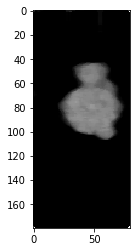

Probe: pos=[0.02 0.   0.  ], angle=40.000000
Teddy:
belly: pos=[0.025 0.    0.04 ], r=0.01,
head: pos=[0.025 0.    0.026], r=0.005,
paw: pos=[0.025      0.00872098 0.03127902], r=0.0033333333333333335
paw: pos=[0.025      0.00872098 0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.03127902], r=0.0033333333333333335



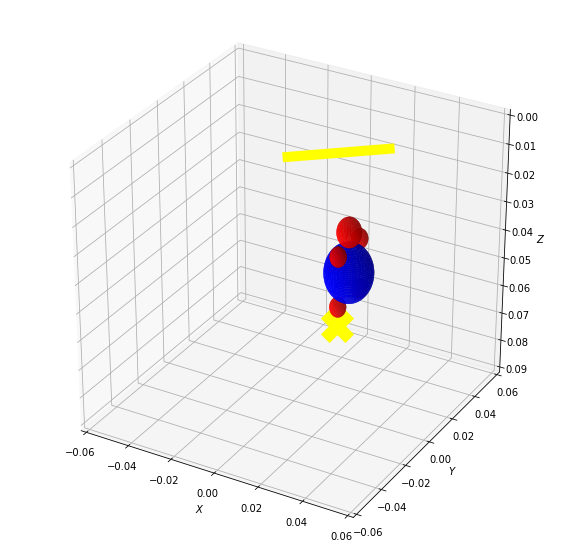

In [6]:
# przesun glowice o 10 mm w prawo
ob, reward, episode_over, _ = env.step(action=[1, 0, 0])
print("reward %f" % reward)
plt.imshow(ob, cmap='gray')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')
env.render_pyplot(ax)
print(env.to_string())

Simulating linear array in Field II...
...simulation completed.
reward 0.020616


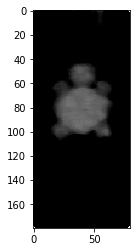

Probe: pos=[0.02 0.   0.  ], angle=90.000000
Teddy:
belly: pos=[0.025 0.    0.04 ], r=0.01,
head: pos=[0.025 0.    0.026], r=0.005,
paw: pos=[0.025      0.00872098 0.03127902], r=0.0033333333333333335
paw: pos=[0.025      0.00872098 0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.03127902], r=0.0033333333333333335



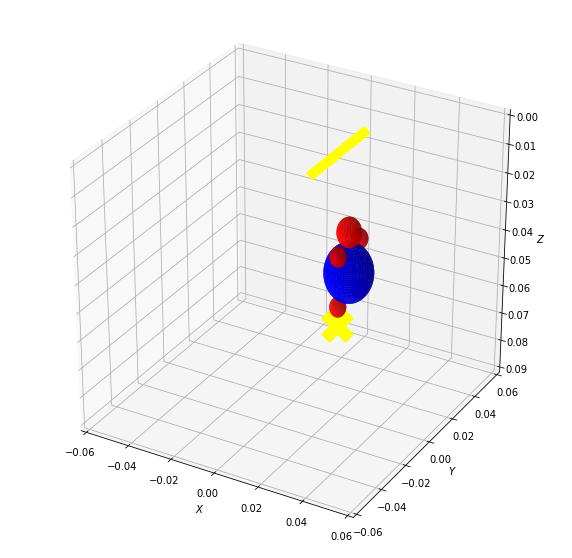

In [7]:
# obroc glowice o 50 stopni
ob, reward, episode_over, _ = env.step(action=[0, 0, 5])
print("reward %f" % reward)
plt.imshow(ob, cmap='gray')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')
env.render_pyplot(ax)
print(env.to_string())

Simulating linear array in Field II...
...simulation completed.
reward 0.011180


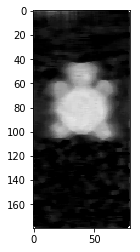

Probe: pos=[0.02 0.   0.  ], angle=90.000000
Teddy:
belly: pos=[0.025 0.    0.04 ], r=0.01,
head: pos=[0.025 0.    0.026], r=0.005,
paw: pos=[0.025      0.00872098 0.03127902], r=0.0033333333333333335
paw: pos=[0.025      0.00872098 0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.03127902], r=0.0033333333333333335



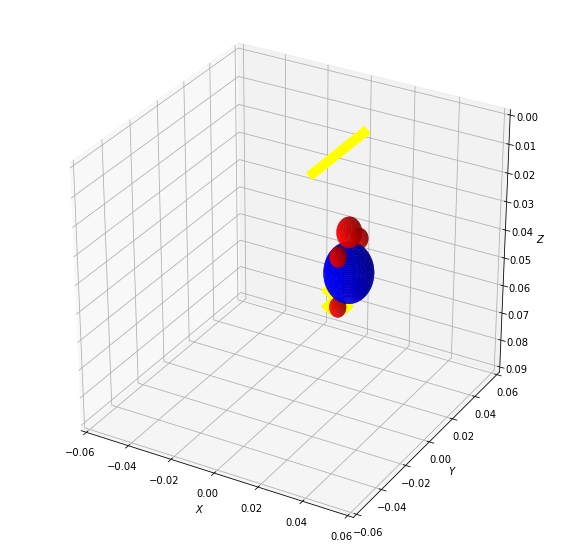

In [8]:
# przesun focal point o 10 mm w gore
ob, reward, episode_over, _ = env.step(action=[0, -1, 0])
print("reward %f" % reward)
plt.imshow(ob, cmap='gray')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')
env.render_pyplot(ax)
print(env.to_string())

Simulating linear array in Field II...
...simulation completed.
reward 0.005000


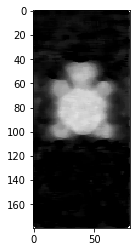

Probe: pos=[0.02 0.   0.  ], angle=90.000000
Teddy:
belly: pos=[0.025 0.    0.04 ], r=0.01,
head: pos=[0.025 0.    0.026], r=0.005,
paw: pos=[0.025      0.00872098 0.03127902], r=0.0033333333333333335
paw: pos=[0.025      0.00872098 0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.04872098], r=0.0033333333333333335
paw: pos=[ 0.025      -0.00872098  0.03127902], r=0.0033333333333333335



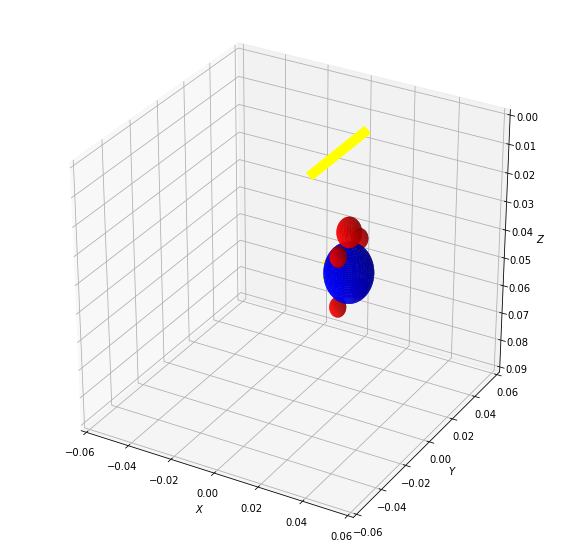

In [9]:
# przesun focal point o 10 mm w gore
ob, reward, episode_over, _ = env.step(action=[0, -1, 0])
print("reward %f" % reward)
plt.imshow(ob, cmap='gray')
plt.show()

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111, projection='3d')
env.render_pyplot(ax)
print(env.to_string())

In [10]:
# Aby zakonczyc dzialanie symulatora, wywolaj ponizsza metode.
env.field_session._cleanup()

Waiting till all child processes die...
All subprocesses are dead now, session is closed.
